In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [3]:
from keras import layers,models
from keras.utils import to_categorical

In [4]:
(xt,yt),(xts,yts)=mnist.load_data()

In [5]:
xt=xt.reshape(-1,28,28,1).astype("float32")/255.0
xts=xts.reshape(-1,28,28,1).astype("float32")/255.0

In [6]:
nc=10
yt=to_categorical(yt,num_classes=nc)
yts=to_categorical(yts,num_classes=nc)

In [8]:
model=models.Sequential([
    layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation="relu",padding="same"),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64,(3,3),activation="relu",padding="same"),
    layers.Flatten(),

    layers.Dense(64,activation="relu"),
    layers.Dense(nc,activation="softmax")
])

c:\Users\midhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [10]:
hist=model.fit(xt,yt,epochs=5,batch_size=64,validation_data=(xts,yts))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9525 - loss: 0.1549 - val_accuracy: 0.9837 - val_loss: 0.0466
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9862 - loss: 0.0445 - val_accuracy: 0.9865 - val_loss: 0.0409
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9886 - val_loss: 0.0348
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9927 - loss: 0.0230 - val_accuracy: 0.9889 - val_loss: 0.0326
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9944 - loss: 0.0188 - val_accuracy: 0.9906 - val_loss: 0.0266


In [11]:
test_loss,test_accuracy=model.evaluate(xts,yts,verbose=2)
print("Test Accuracy: ",test_accuracy)
print("Test Loss: ",test_loss)

313/313 - 1s - 3ms/step - accuracy: 0.9906 - loss: 0.0266
Test Accuracy:  0.9905999898910522
Test Loss:  0.026590930297970772


In [12]:
import matplotlib.pyplot as plt
import numpy as np

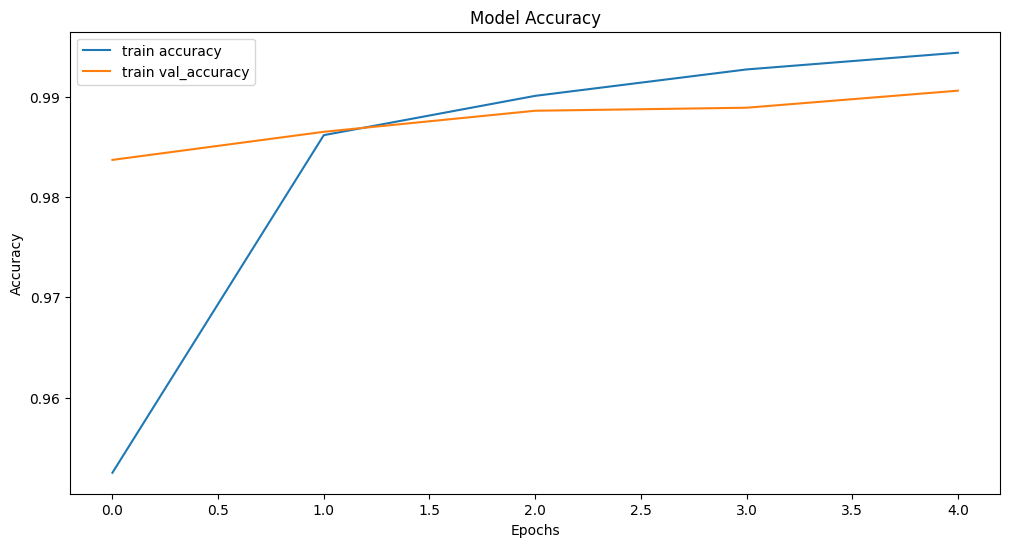

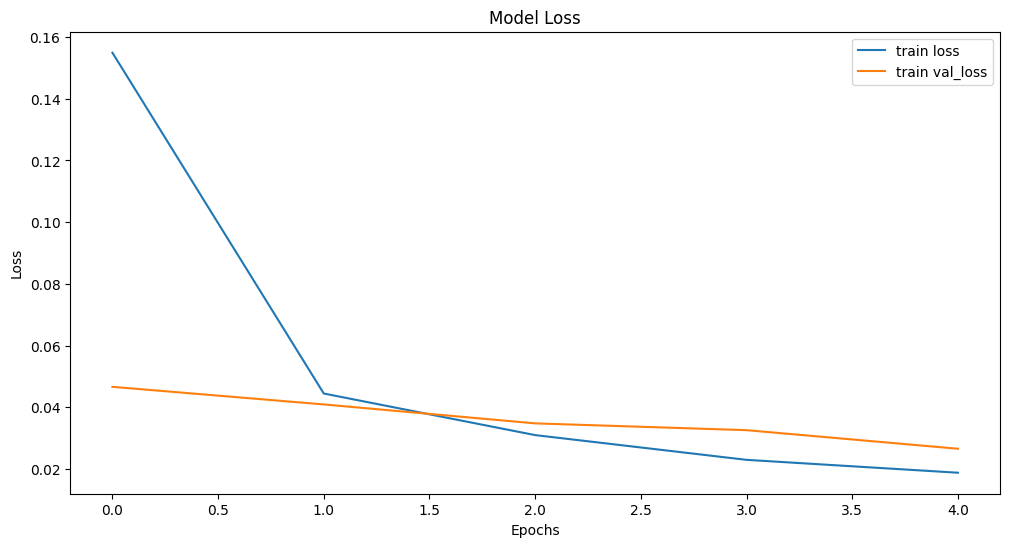

In [14]:
plt.figure(figsize=(12,6))
plt.plot(hist.history['accuracy'],label="train accuracy")
plt.plot(hist.history['val_accuracy'],label="train val_accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'],label="train loss")
plt.plot(hist.history["val_loss"],label="train val_loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,488 (2.94 MB)

 Trainable params: 257,162 (1004.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 514,326 (1.96 MB)

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


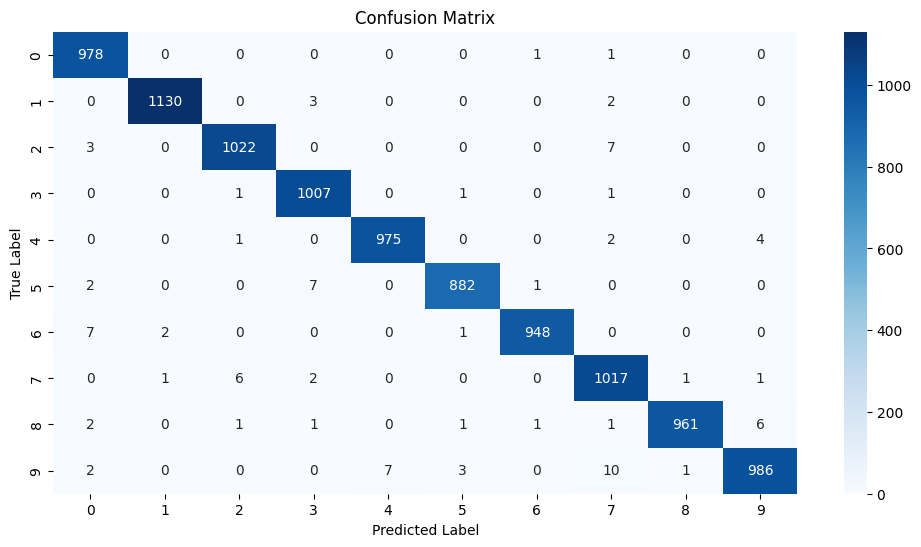

In [17]:
y_pre_pro=model.predict(xts)
y_predict_classes=np.argmax(y_pre_pro,axis=1)

y_true_classes=np.argmax(yts,axis=1)

cm=confusion_matrix(y_true_classes,y_predict_classes)

plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()